## Week 5 Lab Exercise

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from torch.utils.data import Dataset, DataLoader

## Lab Exercise

### 1) Implement convolution operation for a sample image of shape (H=6, W=6, C=1) with a random kernel of size (3,3) using torch.nn.functional.conv2d. What is the dimension of the output image? Apply, various values for parameter stride=1 and note the change in the dimension of the output image. Arrive at an equation for the output image size with respect to the kernel size and stride and verify your answer with code. Now, repeat the exercise by changing padding parameter. Obtain a formula using kernel, stride, and padding to get the output image size. What is the total number of parameters in your network? Verify with code.

In [8]:
# Step 1: Define the image and kernel
image = torch.rand(6, 6)  # Random image of shape (6, 6)
print("image=", image)

# Add batch dimension (1, 6, 6)
image = image.unsqueeze(dim=0)
print("image.shape=", image.shape)

# Add channel dimension (1, 1, 6, 6)
image = image.unsqueeze(dim=0)
print("image.shape=", image.shape)

# Kernel of size (3, 3)
kernel = torch.ones(3, 3)  # You can also use torch.rand(3, 3) for a random kernel
print("kernel=", kernel)

# Add batch and channel dimensions to kernel (1, 1, 3, 3)
kernel = kernel.unsqueeze(dim=0)
kernel = kernel.unsqueeze(dim=0)

# Step 2: Perform the convolution with stride 1 and padding 0
outimage_stride1 = F.conv2d(image, kernel, stride=1, padding=0)
print("outimage with stride=1 and padding=0:", outimage_stride1.shape)

# Step 3: Perform the convolution with stride 2 and padding 0
outimage_stride2 = F.conv2d(image, kernel, stride=2, padding=0)
print("outimage with stride=2 and padding=0:", outimage_stride2.shape)

# Step 4: Perform the convolution with padding=1 and stride=1
outimage_padding1 = F.conv2d(image, kernel, stride=1, padding=1)
print("outimage with stride=1 and padding=1:", outimage_padding1.shape)

# Step 5: Perform the convolution with padding=3 and stride=1
outimage_padding3 = F.conv2d(image, kernel, stride=1, padding=3)
print("outimage with stride=1 and padding=3:", outimage_padding3.shape)

# Step 6: Calculate the total number of parameters in the kernel
print("Total parameters in the kernel:", kernel.numel())  # This will print 9

# Step 7: Verify with a larger input image (1, 1, 6, 6) and kernel of (1, 1, 3, 3)
img = torch.rand(1, 1, 6, 6)  # Random image of size (1, 1, 6, 6)
kernel = torch.rand(1, 1, 3, 3)  # Random kernel of size (3, 3)

outimage = F.conv2d(img, kernel, stride=1, padding=3)
print("outimage shape with padding=3 and stride=1:", outimage.shape)
print("in image shape:", img.shape)
print("kernel shape:", kernel.shape)


image= tensor([[0.6635, 0.1832, 0.5659, 0.1551, 0.3646, 0.5186],
        [0.0980, 0.0554, 0.4123, 0.3125, 0.4320, 0.2671],
        [0.6326, 0.0655, 0.5716, 0.0545, 0.9428, 0.3850],
        [0.9476, 0.1593, 0.0181, 0.7099, 0.9229, 0.2936],
        [0.5280, 0.7869, 0.7183, 0.0482, 0.9837, 0.8230],
        [0.7902, 0.1853, 0.0134, 0.7421, 0.3173, 0.3056]])
image.shape= torch.Size([1, 6, 6])
image.shape= torch.Size([1, 1, 6, 6])
kernel= tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
outimage with stride=1 and padding=0: torch.Size([1, 1, 4, 4])
outimage with stride=2 and padding=0: torch.Size([1, 1, 2, 2])
outimage with stride=1 and padding=1: torch.Size([1, 1, 6, 6])
outimage with stride=1 and padding=3: torch.Size([1, 1, 10, 10])
Total parameters in the kernel: 9
outimage shape with padding=3 and stride=1: torch.Size([1, 1, 10, 10])
in image shape: torch.Size([1, 1, 6, 6])
kernel shape: torch.Size([1, 1, 3, 3])


# Stride and Padding Formulas in Convolutional Layers

### Stride Formula:

$$
n = \left[ \frac{(n-k)}{s} \right] + 1
$$

#### Examples:

- **Stride = 1**

    - Output image size: `torch.Size([1, 1, 4, 4])`
    - Input image size: `torch.Size([1, 1, 6, 6])`
    - Kernel size: `torch.Size([1, 1, 3, 3])`

- **Stride = 2**

    - Output image size: `torch.Size([1, 1, 2, 2])`
    - Input image size: `torch.Size([1, 1, 6, 6])`
    - Kernel size: `torch.Size([1, 1, 3, 3])`

- **Stride = 3**

    - Output image size: Same as stride 2

- **Stride = 4**

    - Output image size: `torch.Size([1, 1, 1, 1])`
    - Input image size: `torch.Size([1, 1, 6, 6])`
    - Kernel size: `torch.Size([1, 1, 3, 3])`

---

### Padding Formula:

$$
n = n - k + 2p + 1
$$

#### Examples:

- **Padding = 1**

    - Output image size: `torch.Size([1, 1, 6, 6])`
    - Input image size: `torch.Size([1, 1, 6, 6])`
    - Kernel size: `torch.Size([1, 1, 3, 3])`

- **Padding = 2**

    - Output image size: `torch.Size([1, 1, 8, 8])`
    - Input image size: `torch.Size([1, 1, 6, 6])`
    - Kernel size: `torch.Size([1, 1, 3, 3])`

- **Padding = 3**

    - Output image size: `torch.Size([1, 1, 10, 10])`
    - Input image size: `torch.Size([1, 1, 6, 6])`
    - Kernel size: `torch.Size([1, 1, 3, 3])`

---

### Combined Formula for Stride and Padding:

$$
n = \left[ \frac{(n-k+2p)}{s} \right] + 1
$$


### 2) Apply torch.nn.Conv2d to the input image of Qn 1 with out-channel=3 and observe the output. Implement the equivalent of torch.nn.Conv2d using the torch.nn.functional.conv2D to get the same output. You may ignore bias.

In [9]:
# Step 1: Define the input image
image = torch.rand(1, 1, 6, 6)  # Random image of shape (1, 1, 6, 6)
print("Original Image Shape:", image.shape)

# Step 2: Apply torch.nn.Conv2d
conv_layer = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, stride=1, padding=0)  # Corrected kernel_size
output_conv2d = conv_layer(image)
print("Output of Conv2d:", output_conv2d.shape)

# Step 3: Implement the same using torch.nn.functional.conv2d
# Create a random kernel of shape (3, 1, 3, 3) (out_channels, in_channels, kernel_height, kernel_width)
kernel = torch.rand(3, 1, 3, 3)

# Apply convolution using F.conv2d
output_functional_conv2d = F.conv2d(image, kernel, stride=1, padding=0)
print("Output of functional conv2d:", output_functional_conv2d.shape)

Original Image Shape: torch.Size([1, 1, 6, 6])
Output of Conv2d: torch.Size([1, 3, 4, 4])
Output of functional conv2d: torch.Size([1, 3, 4, 4])


### 3) Implement CNN for classifying digits in MNIST dataset using PyTorch. Display the classification accuracy in the form of a Confusion matrix. Verify the number of learnable parameters in the model. Training a CNN on an image dataset is similar to training a basic multi-layer feed-forward network on numerical data as outlined below. Define model architecture Load dataset from disk Loop over epochs and batches Make predictions and compute loss Properly zero your gradient, perform backpropagation, and update model parameters

Epoch 1 loss : 0.6761525273323059
Epoch 2 loss : 0.15186956524848938
Epoch 3 loss : 0.10429197549819946
Epoch 4 loss : 0.08374076336622238
Epoch 5 loss : 0.07020652294158936


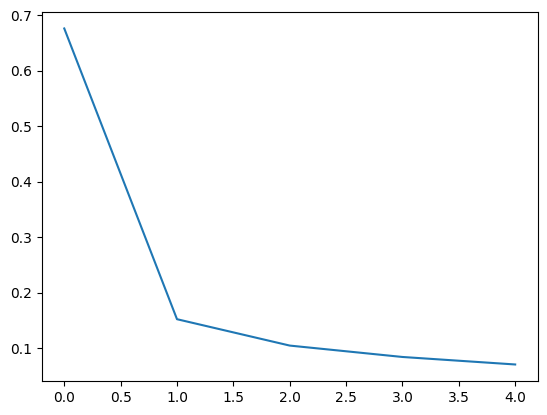

Confusion Matrix:
[[ 967    1    1    1    0    0    3    5    2    0]
 [   0 1131    2    0    0    1    1    0    0    0]
 [   5    0 1002    2    1    0    1   20    1    0]
 [   0    0    1  991    0    5    0    8    3    2]
 [   1    0    1    0  967    0    1    2    1    9]
 [   3    0    0    4    0  877    3    2    3    0]
 [   5    1    1    0    3    5  941    0    2    0]
 [   0    3   12    0    0    1    0 1010    2    0]
 [   2    0    1    1    3    0    0    5  957    5]
 [   3    2    0    2    4    3    0    7    6  982]]
Accuracy: 98.25%
Total number of learnable parameters in the model: 149798


In [10]:
class MNIST_CNN(nn.Module):
	def __init__(self):
		super().__init__()
		self.cnn=nn.Sequential(
			nn.Conv2d(1,64,3),
			nn.ReLU(),
			nn.MaxPool2d((2,2),stride=2),
			nn.Conv2d(64,128,3),
			nn.ReLU(),
			nn.MaxPool2d((2,2),stride=2),
			nn.Conv2d(128,64,3),
			nn.ReLU(),
			nn.MaxPool2d((2,2),stride=2),
			)
		self.linear = nn.Sequential(
			nn.Linear(64,20,bias=True),
			nn.ReLU(),
			nn.Linear(20,10,bias=True))

	def forward(self,x):
		x=self.cnn(x)
		x = x.flatten(start_dim=1)
		x=self.linear(x)
		return x

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

batch_size = 32
trainset = torchvision.datasets.MNIST(root='./data/', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data/', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
device = torch.device("cuda")
model=MNIST_CNN().to(device)

criterion=torch.nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.01)
loss_list=[]

epochs = 5
for epoch in range(epochs):
	epoch_loss=0
	for i,(inputs,labels) in enumerate(trainloader):
		inputs=inputs.to(device)
		labels=labels.to(device)
		optimizer.zero_grad()
		outputs=model(inputs)
		loss=criterion(outputs,labels)
		epoch_loss+=loss
		loss.backward()
		optimizer.step()

	epoch_loss/=len(trainloader)
	print(f"Epoch {epoch+1} loss : {epoch_loss.item()}")
	loss_list.append(epoch_loss.item())

plt.plot(list(range(epochs)),loss_list)
plt.show()
all_preds = []
all_labels = []
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

conf_matrix = confusion_matrix(all_labels, all_preds)
print('Confusion Matrix:')
print(conf_matrix)

accuracy = correct / total
print(f'Accuracy: {accuracy * 100:.2f}%')

num_params = sum(p.numel() for p in model.parameters())
print(f"Total number of learnable parameters in the model: {num_params}")


### 4) Modify CNN of Qn. 3 to reduce the number of parameters in the network. Draw a plot of percentage drop in parameters vs accuracy.

Epoch 1 loss : 0.7920334935188293
Epoch 2 loss : 0.20872041583061218
Epoch 3 loss : 0.15267330408096313
Epoch 4 loss : 0.12674462795257568
Epoch 5 loss : 0.11058185994625092


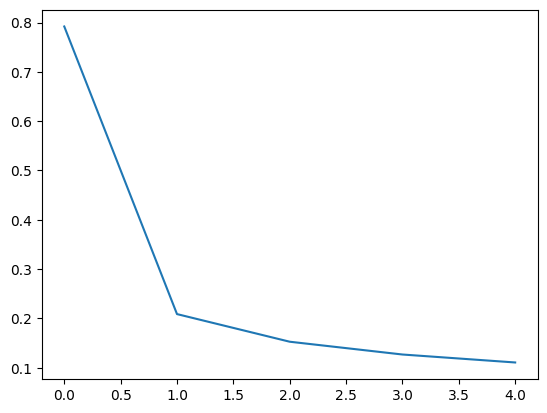

Accuracy: 97.21%
Total number of learnable parameters in the model: 9594


In [11]:
class MNIST_CNN(nn.Module):
	def __init__(self):
		super().__init__()
		self.cnn=nn.Sequential(
			nn.Conv2d(1,16,3),
			nn.ReLU(),
			nn.MaxPool2d((2,2),stride=2),
			nn.Conv2d(16,32,3),
			nn.ReLU(),
			nn.MaxPool2d((2,2),stride=2),
			nn.Conv2d(32,16,3),
			nn.ReLU(),
			nn.MaxPool2d((2,2),stride=2),
			)
		self.linear = nn.Sequential(
			nn.Linear(16,10,bias=True))

	def forward(self,x):
		x=self.cnn(x)
		x = x.flatten(start_dim=1)
		x=self.linear(x)
		return x

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

batch_size = 32
trainset = torchvision.datasets.MNIST(root='./data/', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data/', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
device = torch.device("cuda")
model=MNIST_CNN().to(device)

criterion=torch.nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.01)
loss_list=[]

epochs = 5
for epoch in range(epochs):
	epoch_loss=0
	for i,(inputs,labels) in enumerate(trainloader):
		inputs=inputs.to(device)
		labels=labels.to(device)
		optimizer.zero_grad()
		outputs=model(inputs)
		loss=criterion(outputs,labels)
		epoch_loss+=loss
		loss.backward()
		optimizer.step()

	epoch_loss/=len(trainloader)
	print(f"Epoch {epoch+1} loss : {epoch_loss.item()}")
	loss_list.append(epoch_loss.item())

plt.plot(list(range(epochs)),loss_list)
plt.show()
all_preds = []
all_labels = []
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

accuracy = correct / total
print(f'Accuracy: {accuracy * 100:.2f}%')

num_params = sum(p.numel() for p in model.parameters())
print(f"Total number of learnable parameters in the model: {num_params}")